<h2><b>Handwritten Digits Recognition</b></h2>

<h3><b>1. Importing Modules</h3>

In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

<h3><b>2. Loading the MNIST Dataset</b></h3>

In [63]:
# Loading MNIST dataset from keras libray
# The dataset is split between training and test sets

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

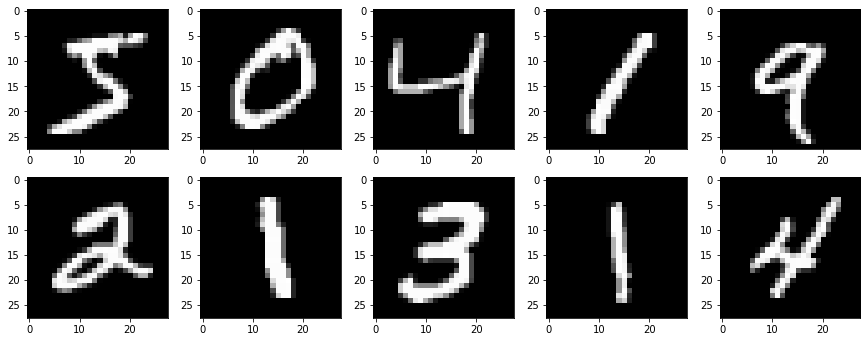

In [64]:
plt.figure(figsize=(15,15))
for i in range(10):
	# define subplot
	plt.subplot(5,5,i+1)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

<h3><b>3. Preprocessing the Data</b></h3>

In [65]:
# Reshaping the data
x_test_original = x_test.copy()
x_train_original = x_train.copy()

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

# Scalling the data

x_train = x_train/255
x_test = x_test/255

<h3><b>4. Creating and Training the Model</b></h3>

In [66]:
# Creating Model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
history = model.fit(x_train, y_train, epochs=10, batch_size = 10, validation_data=(x_test, y_test))

Epoch 1/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2047 - accuracy: 0.9377 - val_loss: 0.1098 - val_accuracy: 0.9655
Epoch 2/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0959 - accuracy: 0.9711 - val_loss: 0.1035 - val_accuracy: 0.9693
Epoch 3/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0705 - accuracy: 0.9778 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 4/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0554 - accuracy: 0.9818 - val_loss: 0.0854 - val_accuracy: 0.9767
Epoch 5/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0979 - val_accuracy: 0.9726
Epoch 6/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0909 - val_accuracy: 0.9787
Epoch 7/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0869 - val_ac

<h3><b>5. Evaluating the Model</b></h3>

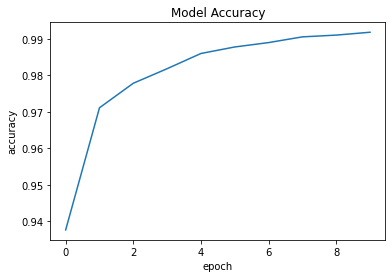

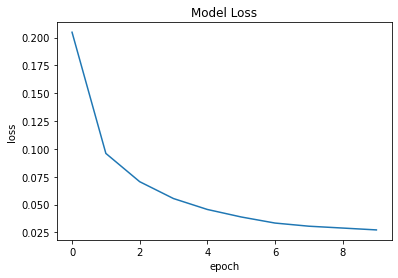

In [88]:
# Plotting Accuracy and Loss Graph for Trained Model

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [68]:
# Evaluating accuracy against test dataset

score = model.evaluate(x_test, y_test, verbose=0)
print('Loss = ', score[0])
print('Accuracy = ', score[1])

Loss =  0.11573973298072815
Accuracy =  0.9771999716758728


Text(69.0, 0.5, 'Truth')

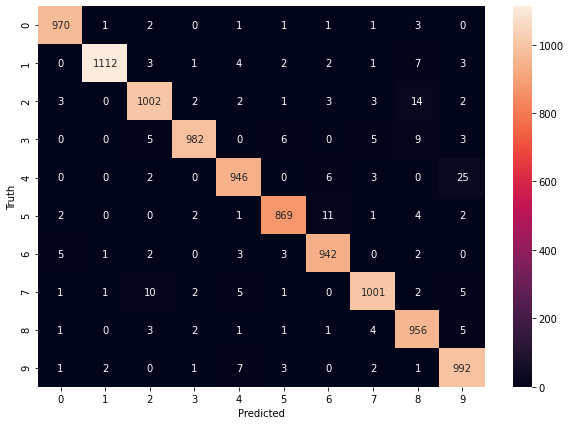

In [70]:
# Heatmap of Confusion Matrix

y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3><b>6. Prediction result of the Test Dataset</b></h3>

In [86]:
predictions = model.predict(x_test)
p_digits = np.argmax(predictions, axis=1)
def accuracy_cal(p_digits, y_test):
  count = 0
  for i in range(len(a)):
    if p_digits[i] == y_test[i]:
      count+=1
  return (count*100/len(a))
print('The accuracy of the model is (in %) =', accuracy_cal(p_digits, y_test))

The accuracy of the model is (in %) = 97.72


The first 10 digits of the test data is shown here:

predicted digits = [7 2 1 0 4 1 4 9 6 9]
expected result = [7 2 1 0 4 1 4 9 5 9]
test images = 


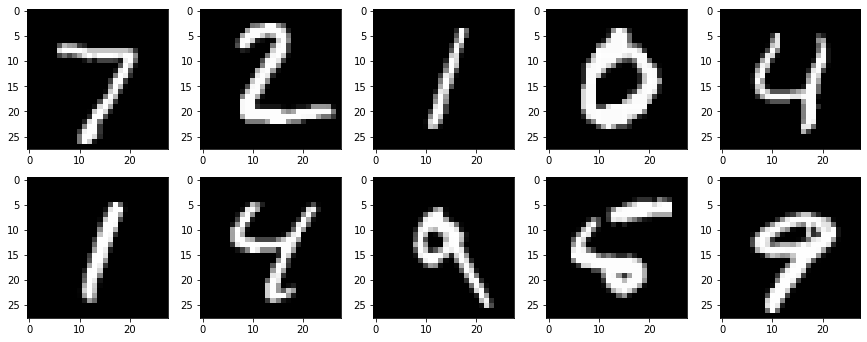

In [87]:
predictions = model.predict(x_test[:10])
print('predicted digits =', np.argmax(predictions, axis=1))
print('expected result =', y_test[:10])
print('test images = ')
plt.figure(figsize=(15,15))
for i in range(10):
	# define subplot
	plt.subplot(5,5,i+1)
	# plot raw pixel data
	plt.imshow(x_test_original[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()